In [1]:

import numpy as np
from cvlib.object_detection import ObjectDetection
from cvlib.tracker import EuclideanDistTracker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import time
import cv2
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
video_name = 'camera4'
video_capture = cv2.VideoCapture(f"./Videos/{video_name}.mp4")

In [4]:
width = 1280
height = 720
dim = (width, height)
def image_resize(img, dim):
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
class_ref =['auto rickshaw', 'bus', 'car', 'motorbike', 'truck']
color_ref =[ (0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (255, 0, 255)]
model_list = ['yolov5n', 'yolov8n', 'rtdetr']

detectorv5 = ObjectDetection(model_list[0])
detectorv8 = ObjectDetection(model_list[1])
detectorrtd = ObjectDetection(model_list[2])

Dectector model is loading...
Model path:  c:\Users\drawt\Downloads\Subject\HKI-2023-2024\CV++\Final\Car_counting\Models\YOLOV5N\weights\last.pt
You are using:  yolov5n
YOLOv5n summary: 262 layers, 2509439 parameters, 0 gradients, 7.2 GFLOPs
Dectector info:  (262, 2509439, 0, 7.1810048)
Dectector model is loaded!
Dectector model is loading...
Model path:  c:\Users\drawt\Downloads\Subject\HKI-2023-2024\CV++\Final\Car_counting\Models\YOLOV8N\weights\last.pt
You are using:  yolov8n
Model summary: 225 layers, 3011823 parameters, 0 gradients, 8.2 GFLOPs
Dectector info:  (225, 3011823, 0, 8.1984512)
Dectector model is loaded!
Dectector model is loading...
Model path:  c:\Users\drawt\Downloads\Subject\HKI-2023-2024\CV++\Final\Car_counting\Models\RTDETR\weights\last.pt
You are using:  rtdetr
rt-detr-l summary: 677 layers, 32816351 parameters, 0 gradients
Dectector info:  (677, 32816351, 0, 0)
Dectector model is loaded!


In [13]:
max_of_frame = 100
start_frame = 150

In [33]:
def calculate_time(detector):
    n_of_frame = 0
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    tic = time.time()
    timet = []
    frame_take = []
    while True:
        ret, frame = video_capture.read()
        if ret:

            #frame = image_resize(frame, dim)
            cars, _, _ = detector.predict(frame, threshold=30, plot=False)

            toc = time.time()
            if n_of_frame > 0:
                timet.append(timet[-1] + (toc-tic)*1000)
            else:
                timet.append((toc-tic)*1000)
            for (x,y,xx,yy) in cars:
                cv2.rectangle(frame,(x,y),(xx,yy),(0,0,255),2) 
            frame_take.append(frame)
            tic = time.time()
            n_of_frame += 1
            video_capture.set(cv2.CAP_PROP_POS_FRAMES, start_frame + n_of_frame*30)
            # if render:
            #     video_results.write(frame)
            # cv2.imshow("frame", frame)
        else:
            break;
        if n_of_frame == max_of_frame:
            break;
    return timet, frame_take

In [34]:
yolov8_time, yolov8_frame = calculate_time(detectorv8)
yolov5_time, yolov5_frame = calculate_time(detectorv5)
detr_time, detr_frame = calculate_time(detectorrtd)

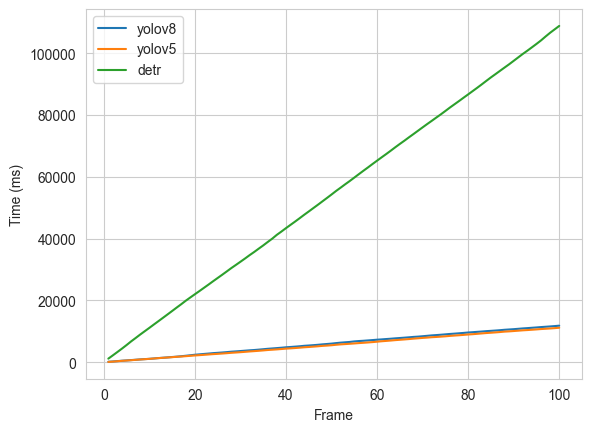

In [35]:
plt.plot(range(1,max_of_frame+1), yolov8_time, label="yolov8")
plt.plot(range(1,max_of_frame+1), yolov5_time, label="yolov5")
plt.plot(range(1,max_of_frame+1), detr_time, label="detr")
plt.xlabel("Frame")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

In [36]:
def plot_list_Frame(frame_list:list, title=["yolo_v5", "yolo_v8", "rtdetr"]):
    sns.set_style("white")
    plt.figure(figsize=(20, 3* len(frame_list)))
    n_col = len(frame_list[0])
    n_row = len(frame_list)
    for i in range(n_row):
        for j in range(n_col):
            plt.subplot(n_row, n_col, i*n_col+j+1)
            cv2.cvtColor(frame_list[i][j], cv2.COLOR_BGR2RGB)
            plt.imshow(frame_list[i][j])
            plt.title(title[i])
    plt.show()
    sns.set_style("whitegrid")

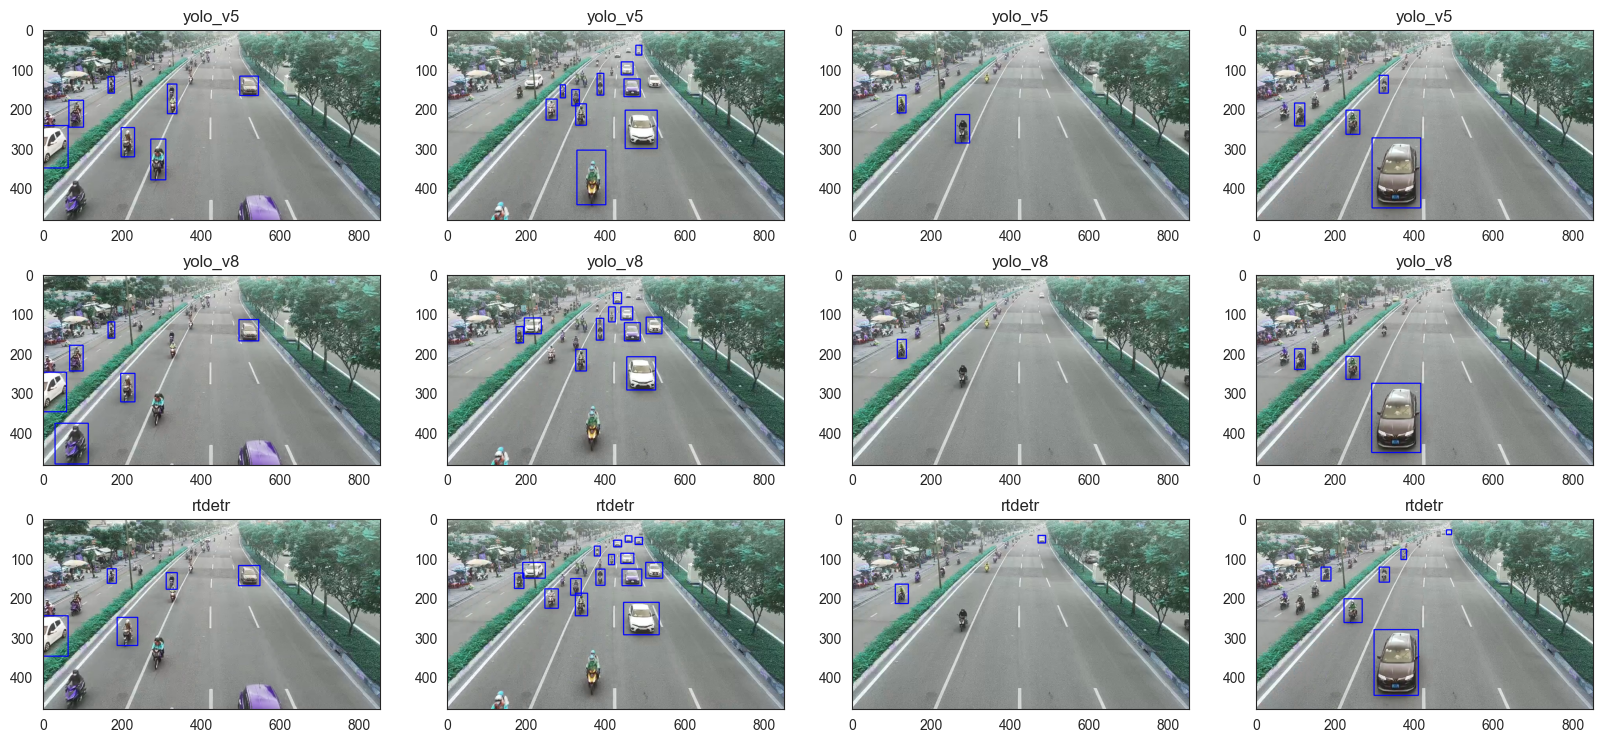

In [37]:
plot_list_Frame([yolov5_frame[::30], yolov8_frame[::30], detr_frame[::30]])